In [1]:
#Importing the necessary pacakages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
pd.set_option('display.max_columns', None)  # Display all columns
pd.set_option('display.max_rows', None)     # Display all rows
pd.set_option('display.width', None)

In [2]:
#Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/bank+marketing/bank-additional/bank-additional/bank-additional.csv', delimiter=';')
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


**Performing Initial level analysis on the dataset**

In [3]:
print("Shape of original dataset: ", df.shape)
print('Dataset contains',df.shape[0],'samples and ',df.shape[1],'variables')
features = [c for c in df.columns if c not in ['id', 'y']]
print('There are',len(features),'number of features')

Shape of original dataset:  (4119, 21)
Dataset contains 4119 samples and  21 variables
There are 20 number of features


**Important Attributes present in the dateset and its explanation**

*   **age:** integer (age of the customer)

*   **job:** categorical (Type of job of the customer)

*  **marital:** categorical (Marital status of the customer)

*  **education:** categorical (Educational Level of the customer)

*  **default:** has credit in has credit in default? Binary

*  **balance:** average yearly balance (euros)

*  **housing:** has housing loan?

*  **loan:** has personal loan?

*  **contact:** contact communication type (categorical: 'cellular','telephone')

*  **day_of_week:** Date (last contact day of the week)
               
*  **campaign:** number of contacts performed during this campaign and for this client (numeric, includes last contact). Number of contacts made with the customer during the current campaign.
              
*  **pdays:** number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
              
*  **previous:** number of contacts performed before this campaign and for this client (numeric)
              
*  **poutcome:** outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
              
*  **y:** has the client subscribed a term deposit? (binary: "yes","no")




**Identification of categorical and numerical values present in the dataset.**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [5]:
#Seperating the categorical and numerical columns
cat_cols = [df.columns[i]
            for i in range(1, df.shape[1]-1)
            if df.iloc[:,i].dtype=='O']
num_cols = [c for c in features if c not in cat_cols]
print("Categorical variables present in the dataset: ",cat_cols)
print("Numerical variables present in the dataset: ",num_cols)

Categorical variables present in the dataset:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical variables present in the dataset:  ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


**Step 1: Performing Quality check on the dataset**

checking if there are any outliers present in the dataset

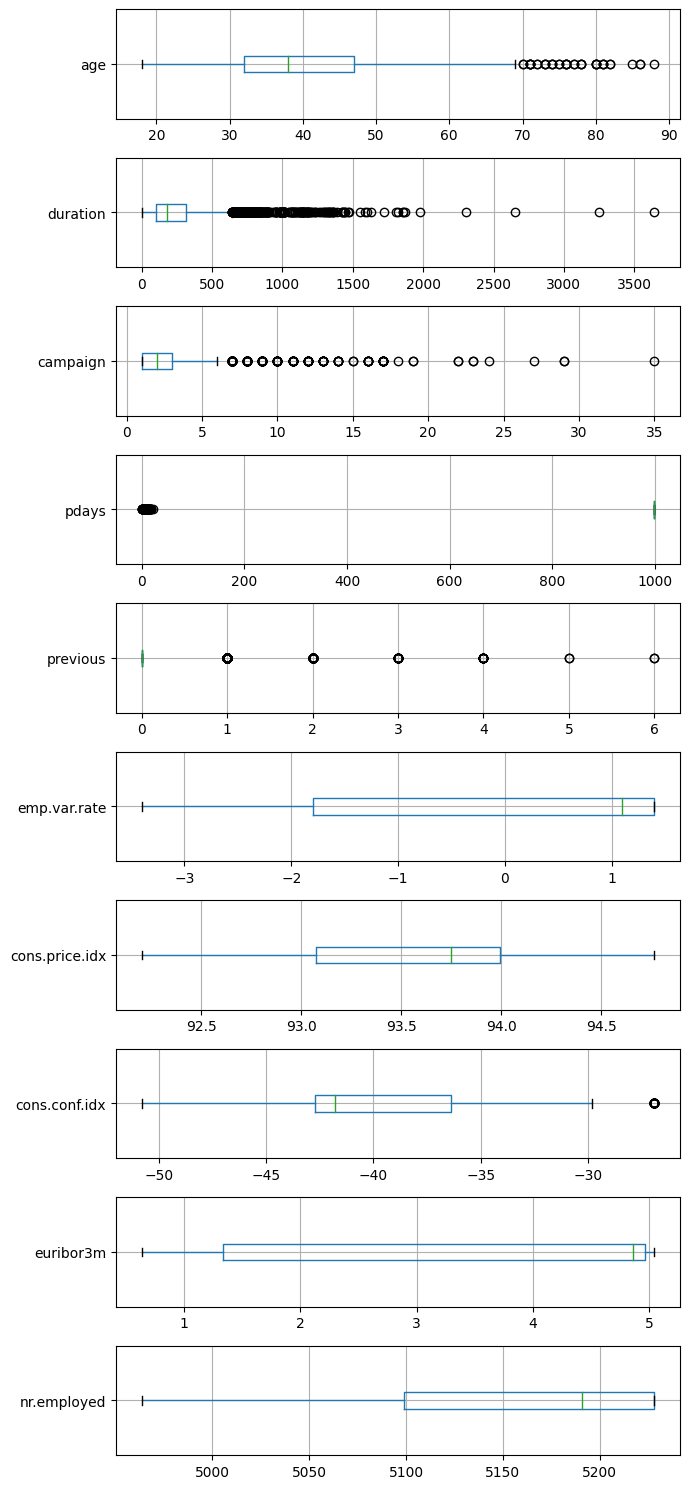

In [6]:
import matplotlib.pyplot as plt

# Assuming you have defined num_cols and df already

# Calculate the number of required subplots based on the number of numerical columns
num_subplots = len(num_cols)

# Create subplots with appropriate number of rows and columns
fig, axes = plt.subplots(num_subplots, 1, figsize=(7, 15))

# Iterate over each numerical column
for i, c in enumerate(num_cols):
    if i < num_subplots:  # Ensure not to exceed the number of subplots
        df[[c]].boxplot(ax=axes[i], vert=False)

plt.tight_layout()
plt.show()

From this we can see higher no of outliers are present in attribtes (age, duration, campaign, pdays, previous). Hence in the preprocessing step we need to include some sort of outlier removal method.

In [7]:
#Checking out the statistical parameters
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**Checking the class balance of the dataset**

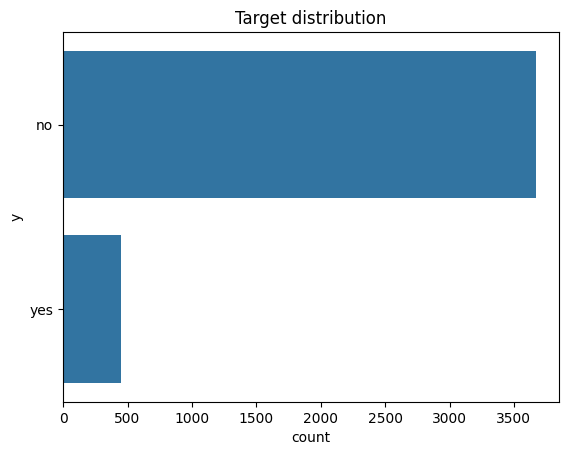

In [8]:
sns.countplot(df['y'])
plt.title('Target distribution')
plt.show()

The given dataset is highly imbalanced, need to add more no of samples to the less no of target variables.

In [9]:
# Checking how many null values present init or not
null_value_percentage = (df.isnull().sum()/df.shape[0])*100
null_value_percentage.sort_values(ascending = False)

age               0.0
campaign          0.0
nr.employed       0.0
euribor3m         0.0
cons.conf.idx     0.0
cons.price.idx    0.0
emp.var.rate      0.0
poutcome          0.0
previous          0.0
pdays             0.0
duration          0.0
job               0.0
day_of_week       0.0
month             0.0
contact           0.0
loan              0.0
housing           0.0
default           0.0
education         0.0
marital           0.0
y                 0.0
dtype: float64

There is no null values present in the dataset and we are good to go.

**Step 2: Performing EDA on categorical variables**

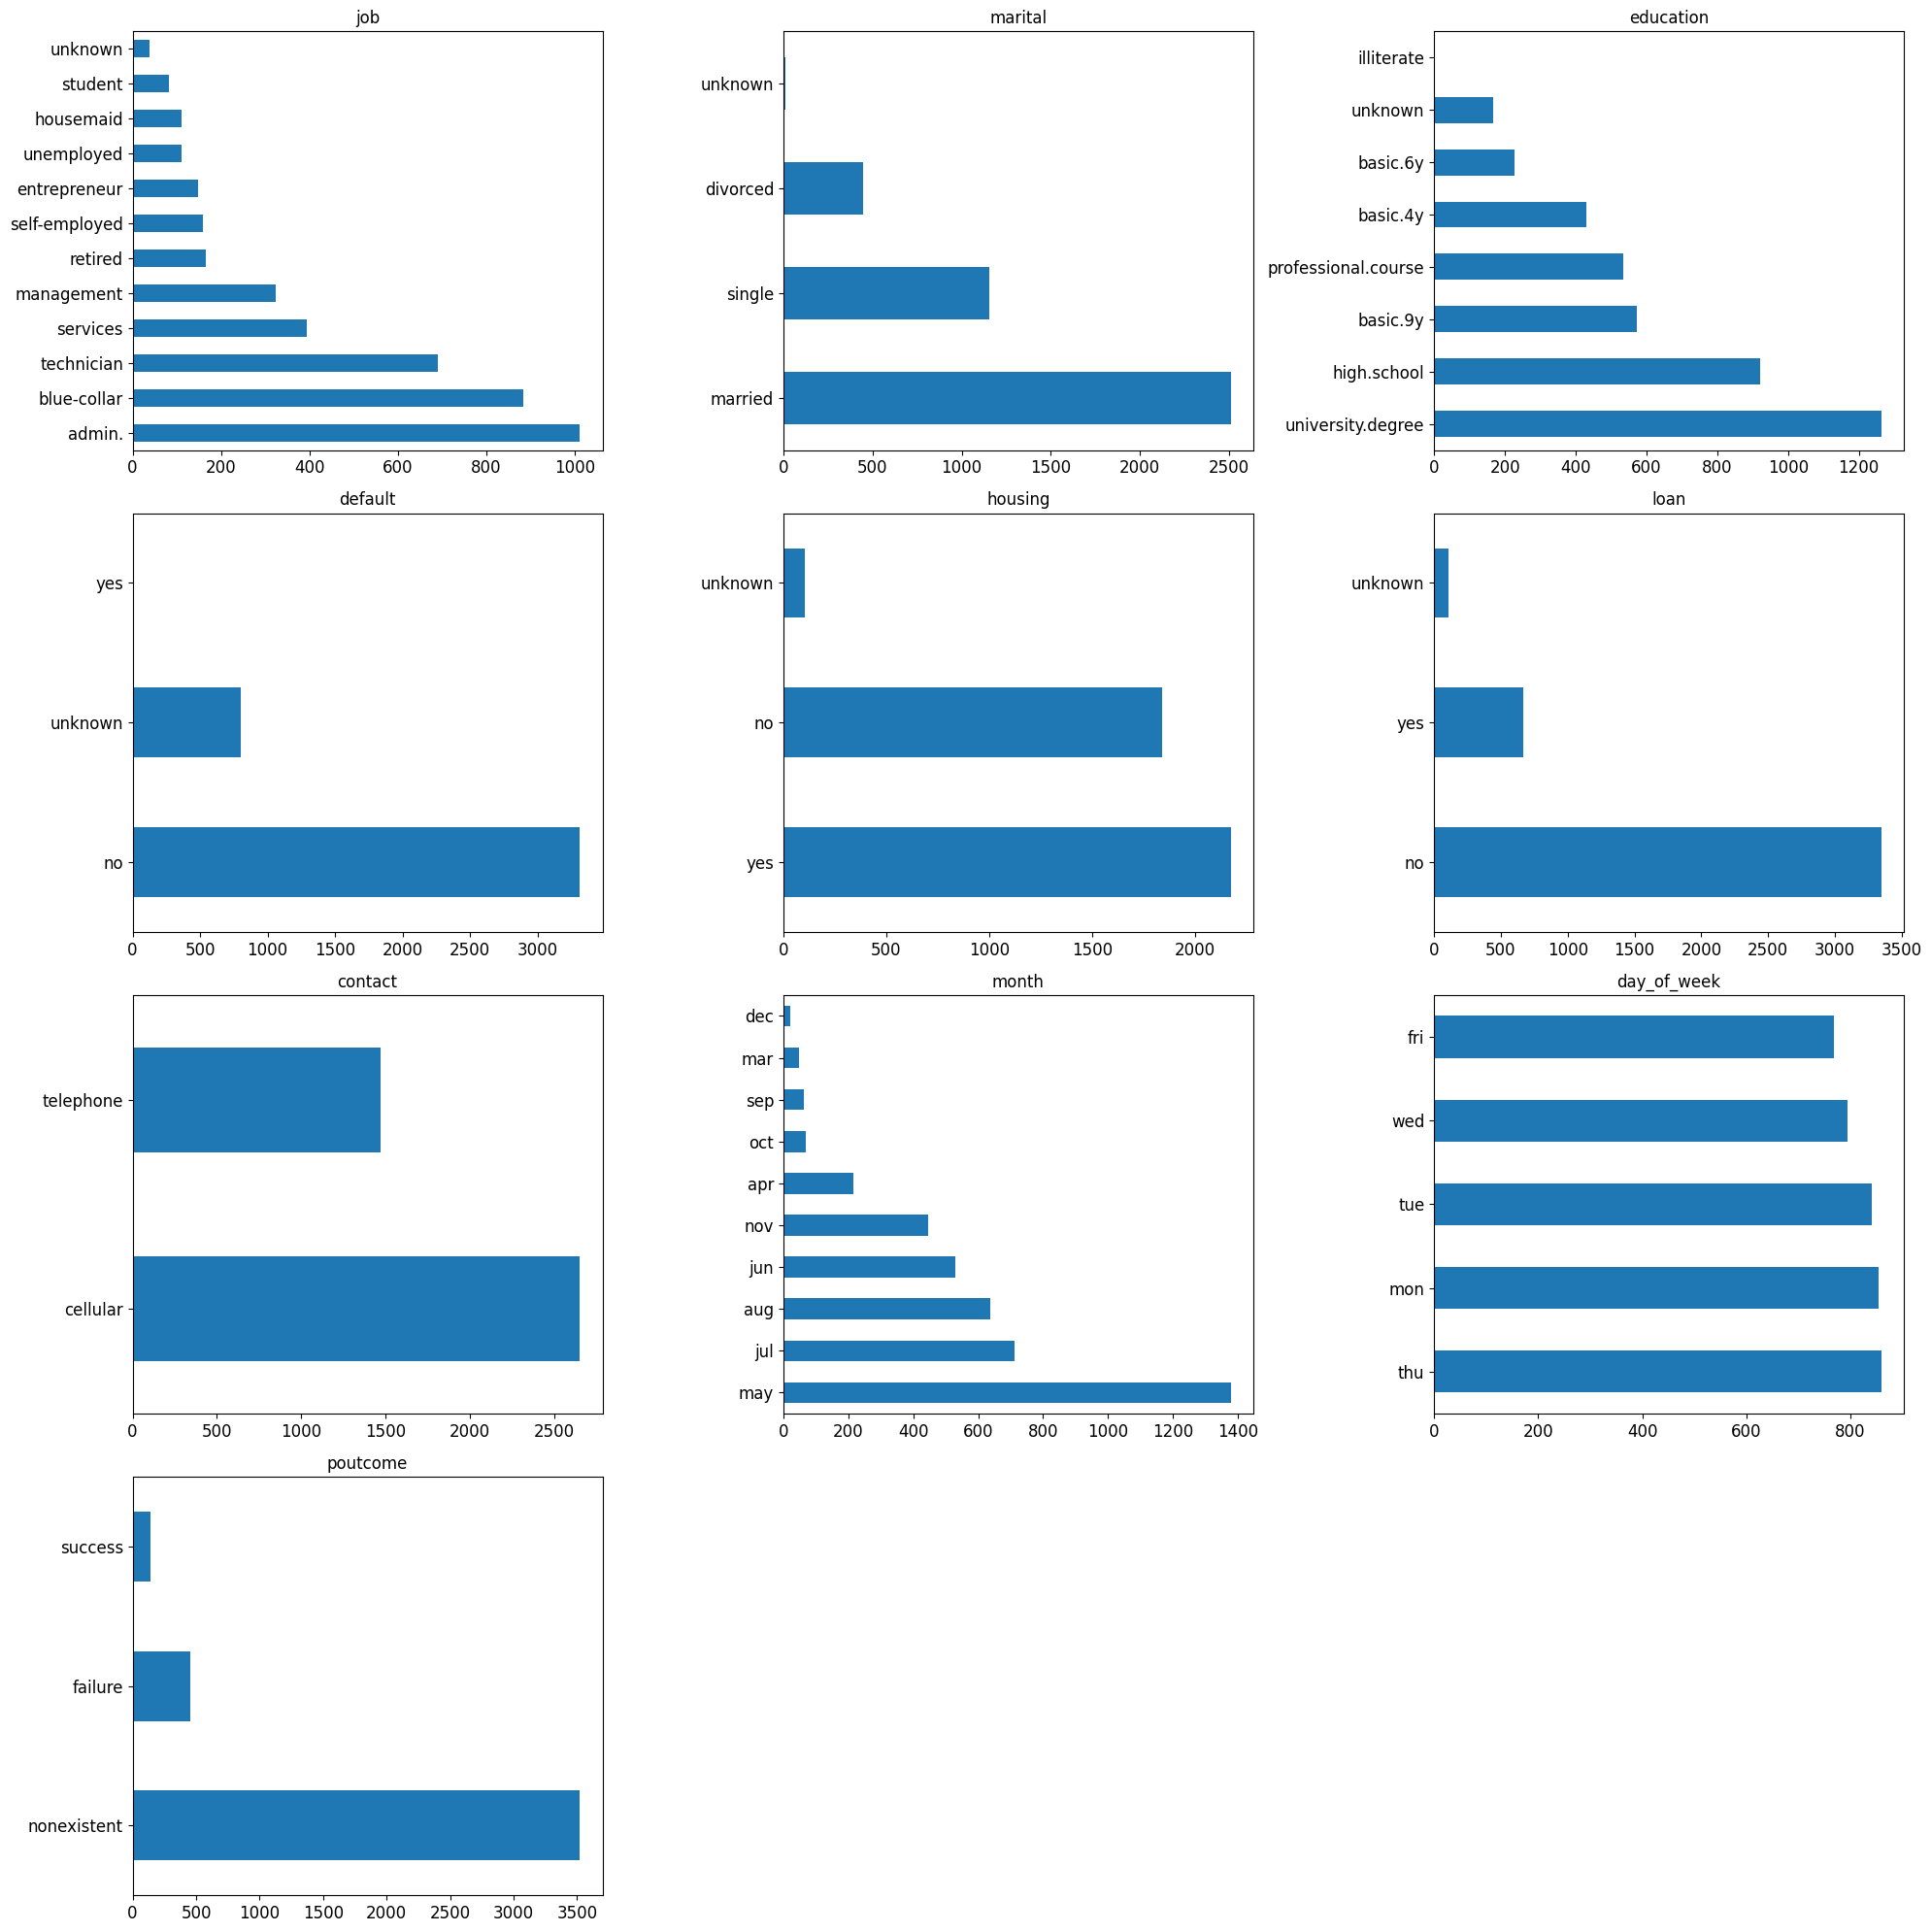

In [10]:
#bar graph for checking the frequency
num_subplots = len(cat_cols)
num_rows = (num_subplots // 3) + (1 if num_subplots % 3 != 0 else 0)

fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows*5))
axes = [ax for axes_rows in axes for ax in axes_rows]

# Iterate over each categorical column
for i, c in enumerate(cat_cols):
    # Get the appropriate axis for the subplot
    ax = axes[i]

    # Plot the value counts
    df[c].value_counts().plot(kind='barh', ax=ax, title=c, fontsize=12)

# Hide any unused subplots
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**Analysis**
In this dataset, client with job type as **admin** are high in number(25%), and low numbers are for **student**(2%) and **unknown**(1%). The majority of the clients are married(61%), also the divorsed records are less.

The 30% of the clients are university degree holders and 22% high school educated. The default feature contains most of the records as **no**. The housing loan opted clients and not opted are almost the same. The majority of clients not taken the personal loan.

The campaign is mostly occured on month **may** and very less in **dec**. The campaign only occurs in weekdays. Only 3% of the previous campaign is successful.

**Finding the relation between the target variable and categorical variables.**

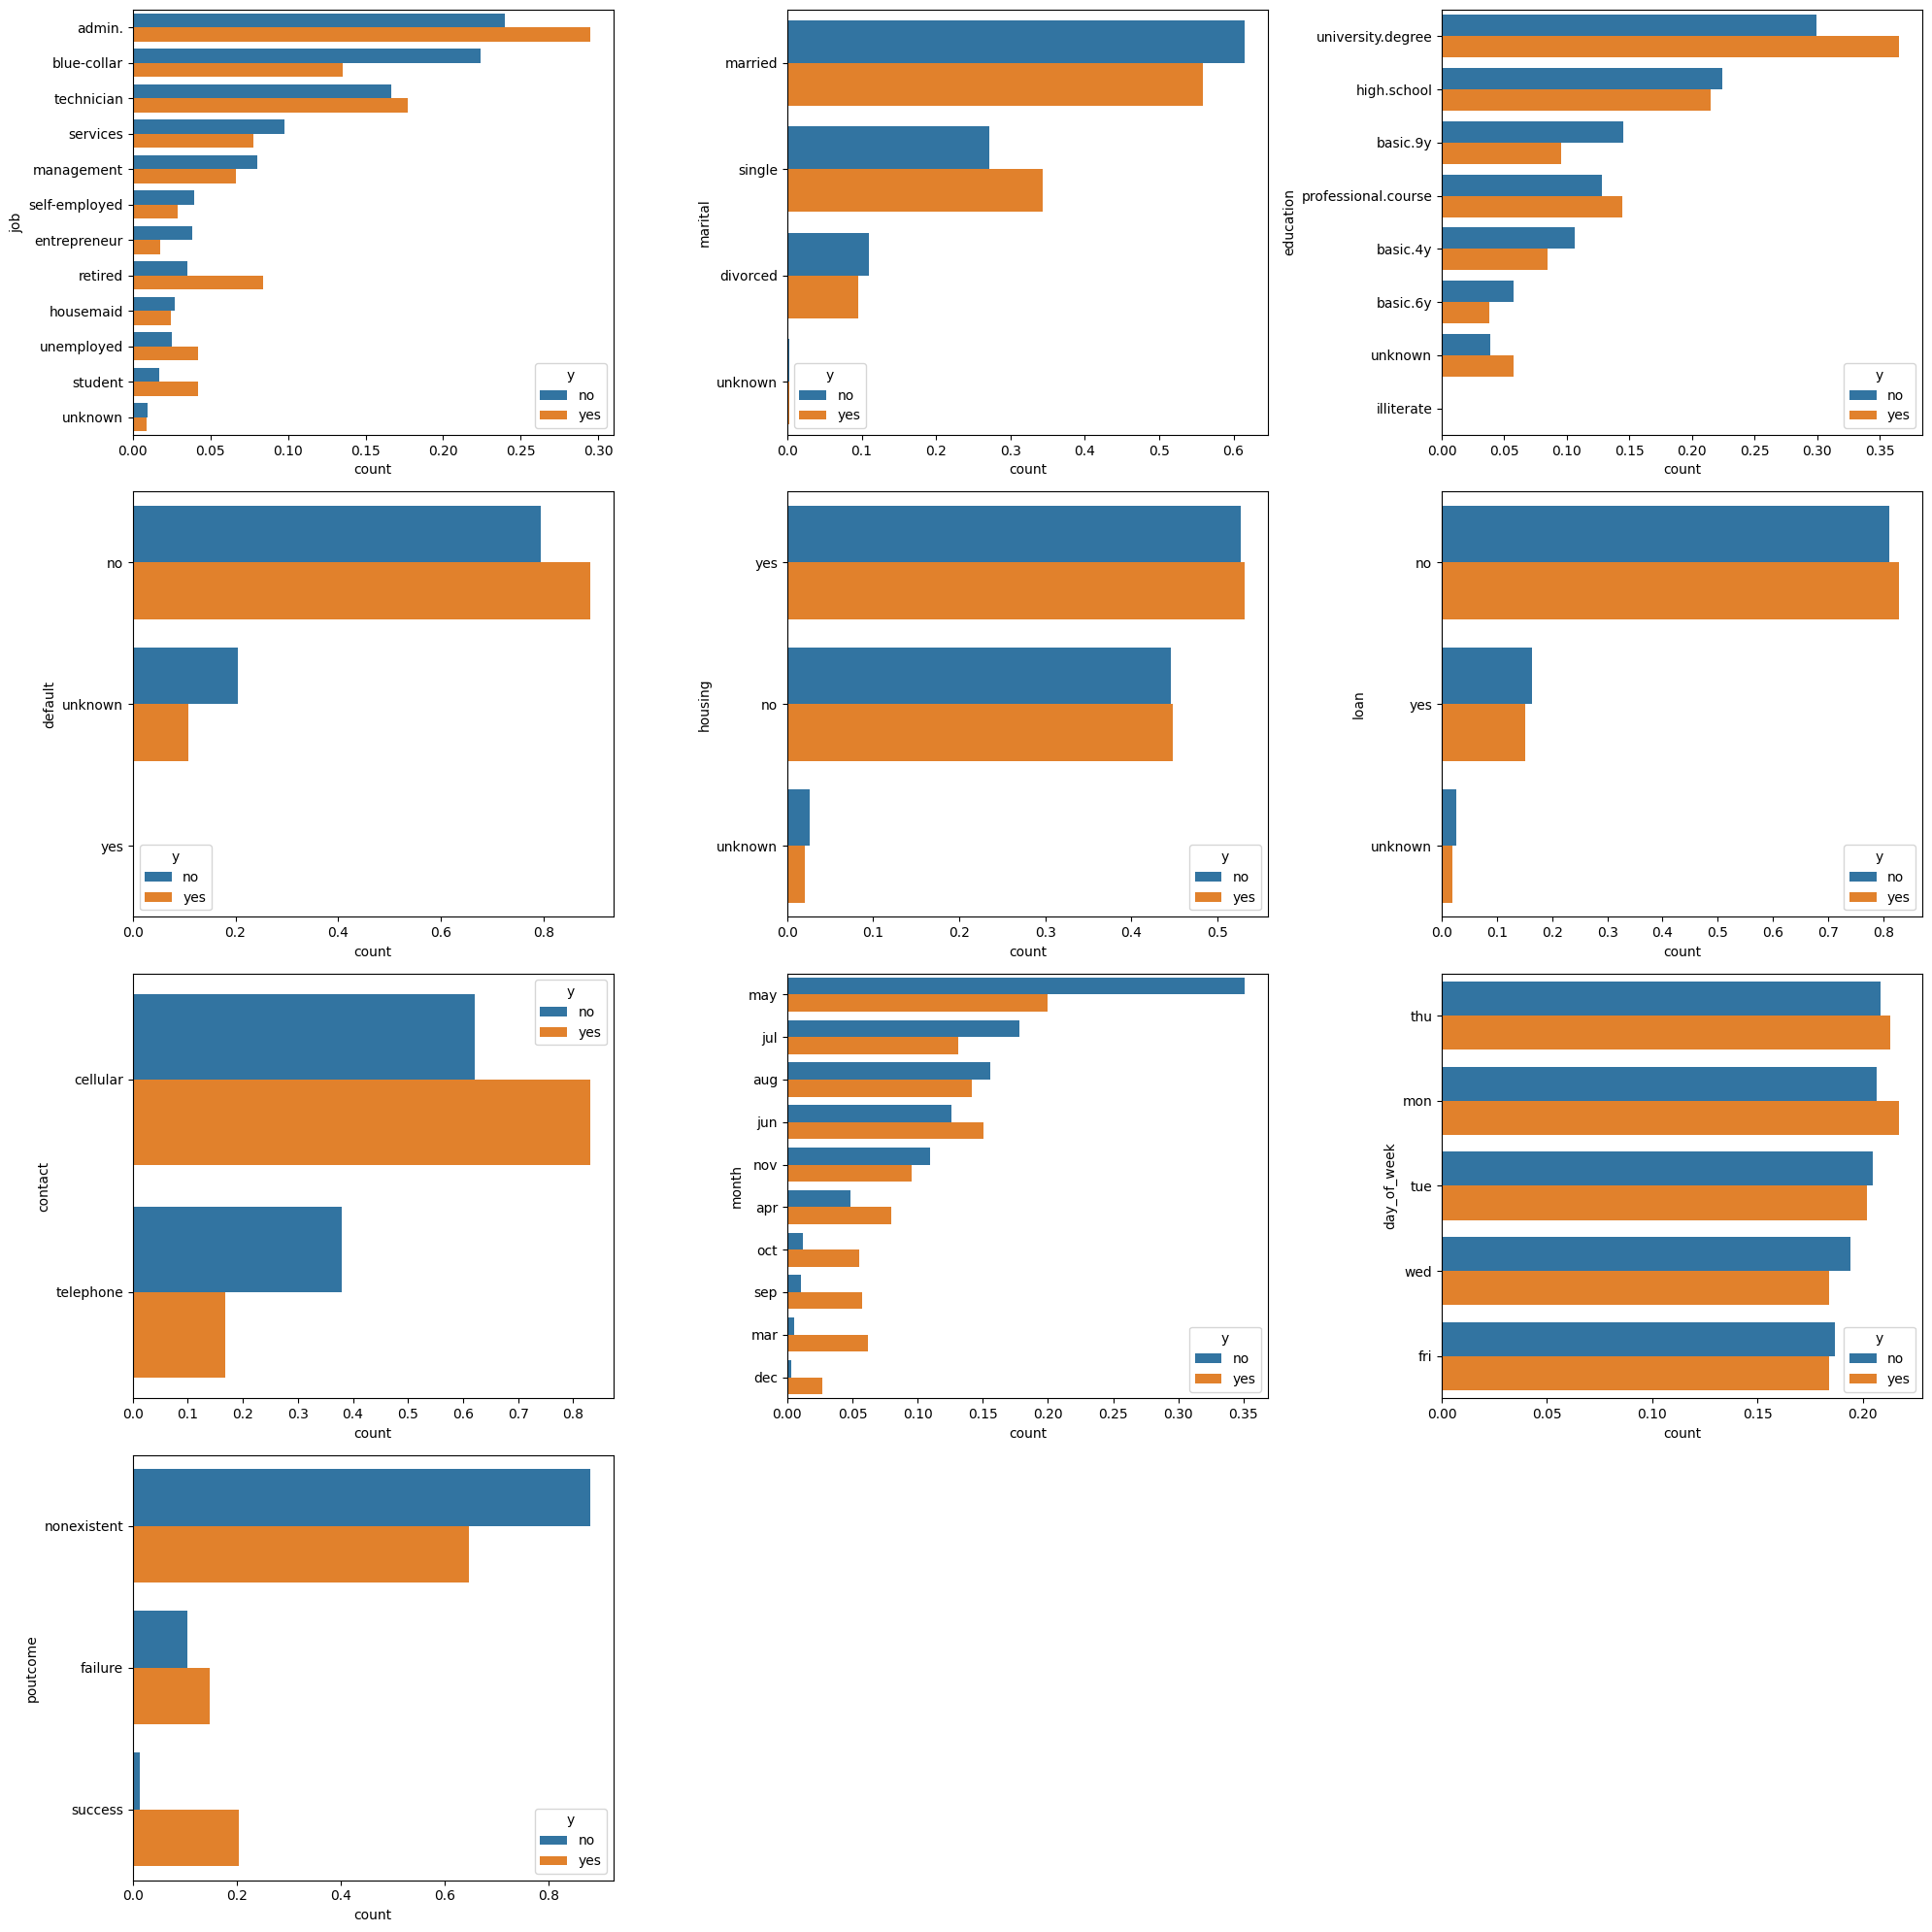

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have defined cat_cols, df, and y already

# Calculate the number of required subplots based on the number of categorical columns
num_subplots = len(cat_cols)
num_rows = (num_subplots // 3) + (1 if num_subplots % 3 != 0 else 0)

# Create subplots with appropriate number of rows and columns
fig, axes = plt.subplots(num_rows, 3, figsize=(20, num_rows*5))
axes = [ax for axes_rows in axes for ax in axes_rows]

# Iterate over each categorical column
for i, c in enumerate(cat_cols):
    if i < num_subplots:
        #index of rows where target_col value is no
        fltr = df['y']=='no'

        #fltr-index of rows where target_col value is no
        #c-column name
        #taking the value count
        #resetting index as column name
        vc_a=df[fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'},
                                                                           axis=1)

        #dataframe conraining rows and columns where target_col value is 1
        vc_b=df[~fltr][c].value_counts(normalize=True).reset_index().rename({'index':c,c:'count'},
                                                                            axis=1)

        #setting target_col value to 0 and 1 respectively
        vc_a['y']='no'
        vc_b['y']='yes'

        #combining into single dataframe
        df1 = pd.concat([vc_a, vc_b]).reset_index(drop=True)

        #plotting
        sns.barplot(y=c, x='count', data=df1, hue='y', ax=axes[i])

# Hide any unused subplots
for j in range(num_subplots, num_rows*3):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


Most of the purchases are done by admin job professionals,married,university degree holders. Singles subscribe more than married and divorced. Clients who has not having personel and home loan has taken the term deposit. Term purchases are more on mon (may, jun).

**Step 3: Performing EDA on numerical variables**

<ipython-input-12-6bb7be269760>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-12-6bb7be269760>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[continuous_feature])
<ipython-input-12-6bb7be269760>:6: UserWarning: 

`distplot` is a deprecated function 

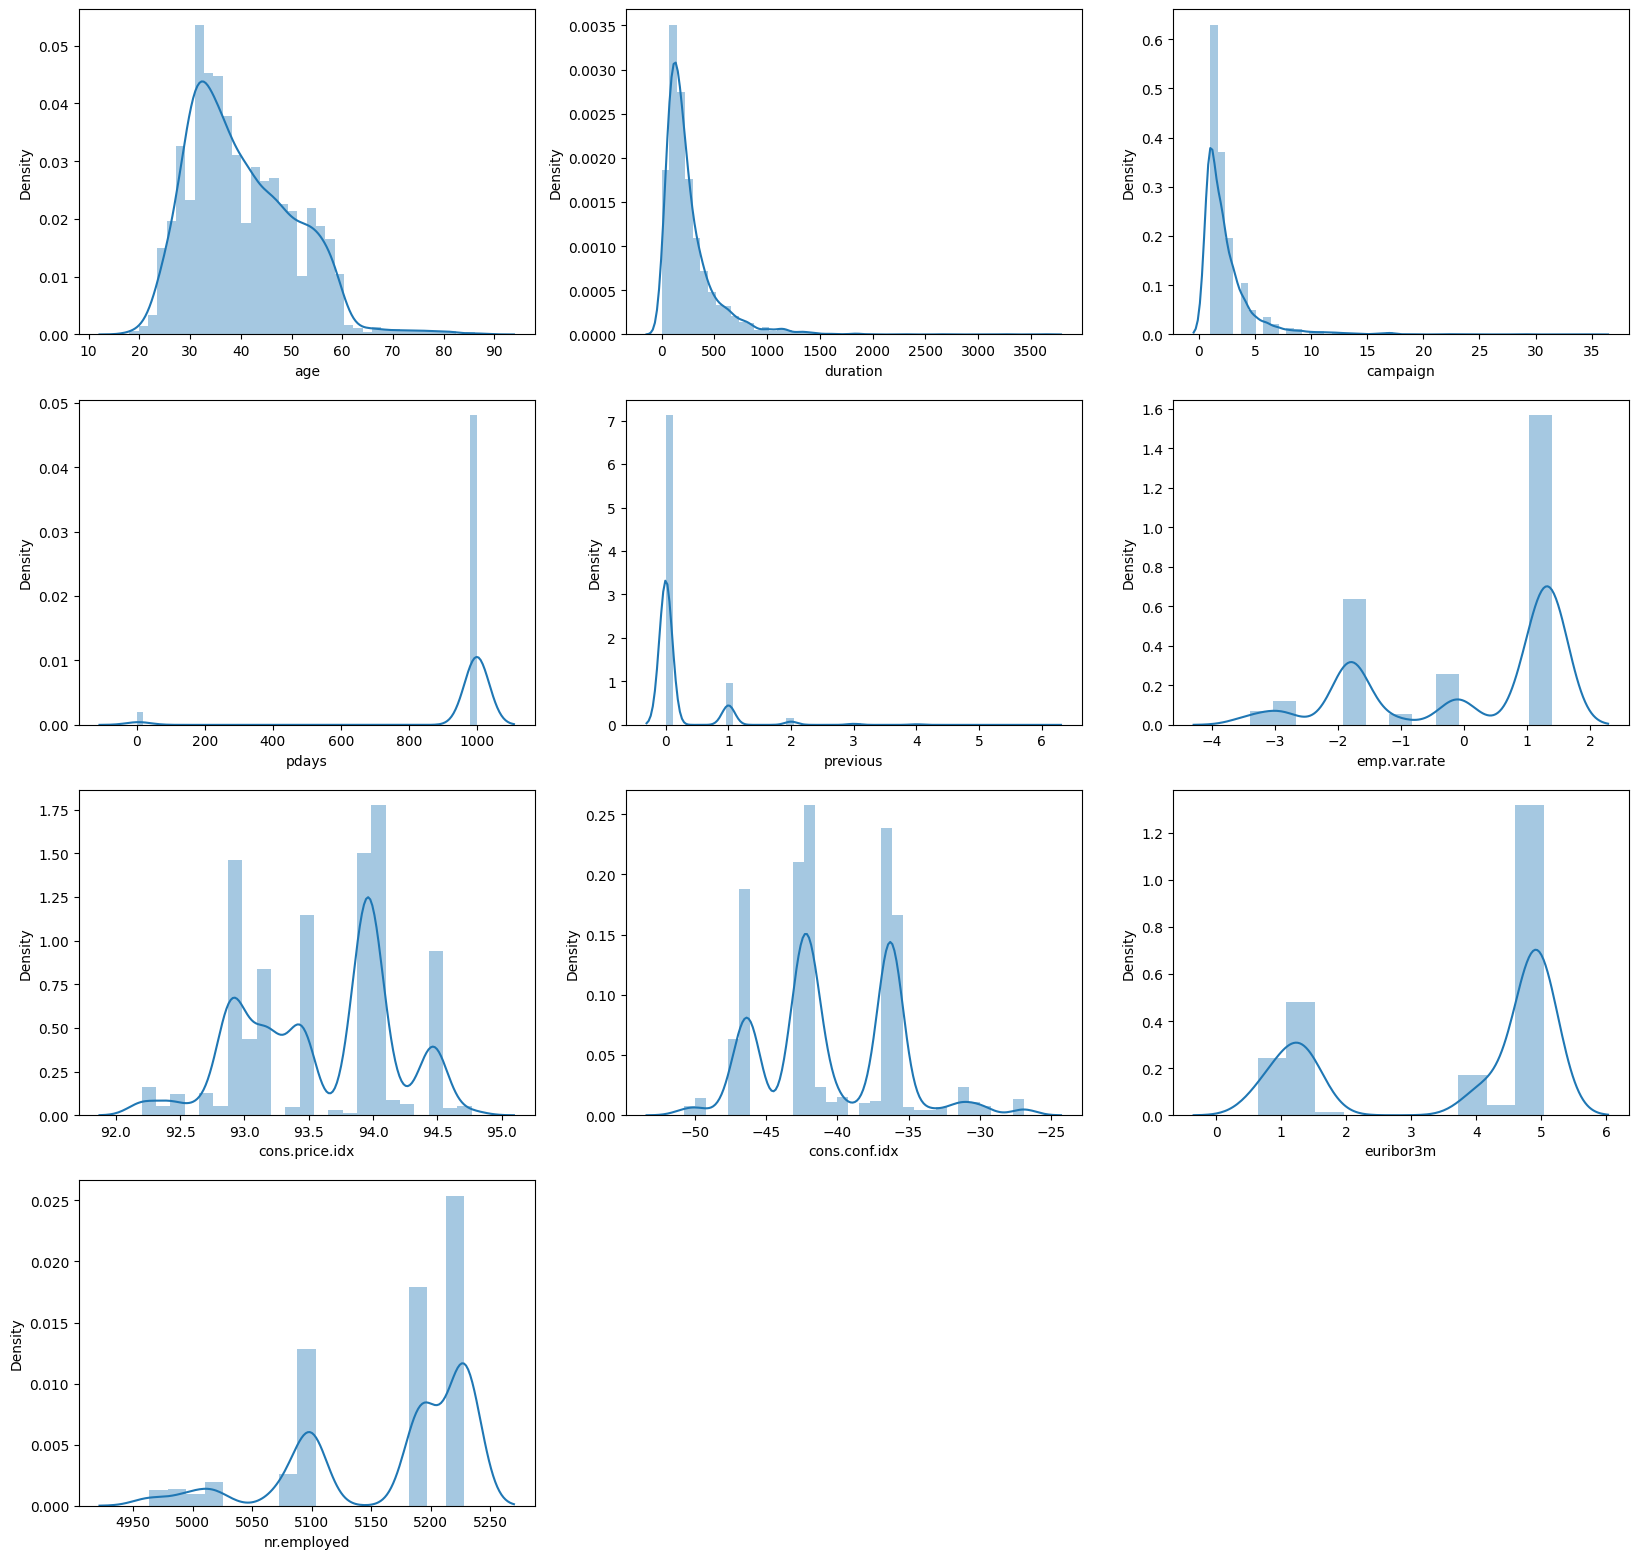

In [12]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

Analysis: age distributed normally but
balance, duration, campaign and previous heavely skewed towards left and seems to be have some outliers. Also its observed that there is a high employee variation rate when the campaign is conducted. The Consumer price index is good which shows the which leads them to make deposits. Here we can see the consumer confidence index is low.  



**Step4 :** Finding the correlation among the variables

<ipython-input-13-b38c2c30bdf8>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

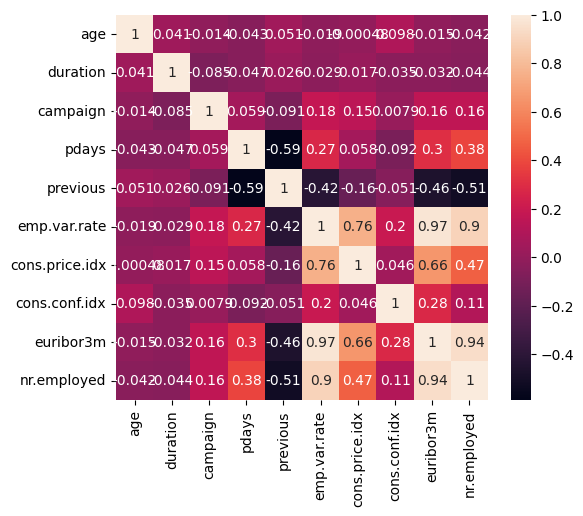

In [13]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(6,5))
sns.heatmap(cor_mat,annot=True)

From the correlation matrix its observed that the number of employes rate is highly correlated with employee variation rate.
employee variation rate and employee rate also correlates with euribor3m.

**Step 5: Implementation of the ML pipeline**

In [14]:
#Creating the ML pipeline
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from imblearn.over_sampling import SMOTE
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
import numpy as np

In [15]:
#Installation of pacakage
!pip install -U imbalanced-learn

**Step 6:** Defining the pipeline

In [16]:
# Define a function to remove outliers using Z-score
def remove_outliers_zscore(df, columns, threshold=3):
    z_scores = stats.zscore(df[columns])
    abs_z_scores = abs(z_scores)
    filtered_entries = (abs_z_scores < threshold).all(axis=1)
    return df[filtered_entries]


class SMOTETransformer(TransformerMixin):
    def __init__(self, **smote_kwargs):
        self.smote = SMOTE(**smote_kwargs)

    def fit(self, X, y):
        # Apply SMOTE only during the fit phase
        self.X_resampled, self.y_resampled = self.smote.fit_resample(X, y)
        return self

    def transform(self, X, y=None):
        # Simply return the input data during the transform phase
        return X

# Define preprocessing steps
# Standardization of numerical variables
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Assuming you have defined cat_cols and num_cols before preprocessor definition
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Assuming you have defined cat_cols and num_cols before preprocessor definition
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', SMOTETransformer(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=0))
])


**Step 7: Training the pipeline**

In [17]:

# Reading the data from the csv file
df = pd.read_csv('/content/drive/MyDrive/bank+marketing/bank-additional/bank-additional/bank-additional.csv', delimiter=';')
df.head(5)

# Defining the features
features = [c for c in df.columns if c != 'y']

# Separating the categorical and numerical columns
cat_cols = [c for c in df.columns if df[c].dtype == 'object' and c != 'y']
num_cols = [c for c in df.columns if c not in cat_cols and c != 'y']

# Remove outliers
df = remove_outliers_zscore(df, num_cols, threshold=3)

#converting the target to numeric
dictionary = {'yes':1,'no':0,'unknown':-1}
df['y'] = df['y'].map(dictionary)

# Split data
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

# Train the pipeline
#pipeline.fit(X_train, y_train)
pipeline.fit(X_train, y_train)


(2973, 20)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('smote', <__main__.SMOTETransformer object at 0x7f2b1efd7340>),
                ('classifier', DecisionTreeClassifier(random_state=0))])

In [18]:
X_train.shape

(2973, 20)

In [19]:
y_train.value_counts()

0    2743
1     230
Name: y, dtype: int64

In [20]:
# Access the transformed data after SMOTE
X_train_smote_shape = pipeline.named_steps['smote'].X_resampled.shape
y_train_smote_shape = pipeline.named_steps['smote'].y_resampled.value_counts()

print("Shape of features after SMOTE:", X_train_smote_shape)
print("Shape of labels after SMOTE:", y_train_smote_shape)

Shape of features after SMOTE: (5486, 61)
Shape of labels after SMOTE: 0    2743
1    2743
Name: y, dtype: int64


**Step 8: Testing the pipeline**

In [21]:
#Testing the pipeline
y_pred = pipeline.predict(X_test)

**Step 9: Evaluating the pipeline**

In [22]:
# Evaluate the model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9059139784946236


In [23]:
# Detailed Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       696
           1       0.32      0.40      0.35        48

    accuracy                           0.91       744
   macro avg       0.64      0.67      0.65       744
weighted avg       0.92      0.91      0.91       744



Confusion Matrix:


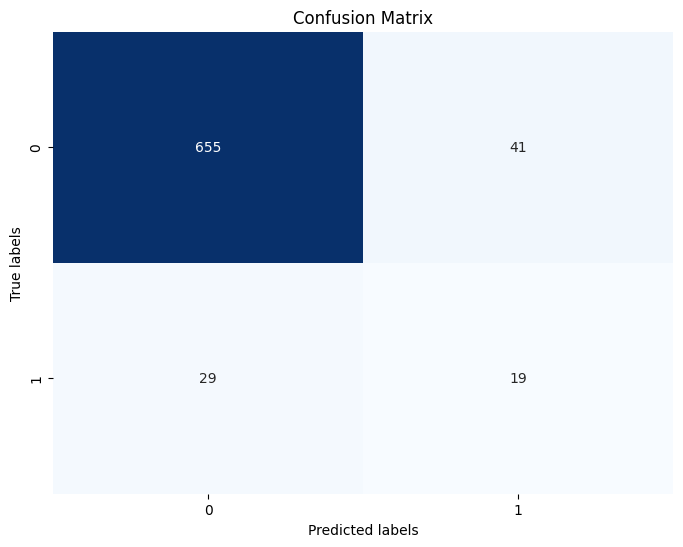

In [24]:
# Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

**Step 10: Recommendation of clients**:
The unique identifiers for the clients are returned using this function

In [25]:

import uuid

def recommended_clients(X_test,y_pred):
  #Adding the pipeline
  y_pred = pipeline.predict(X_test)
  #Adding unique ids for each sample in test dataset
  if 'id' not in X_test.columns:
      unique_ids = [str(uuid.uuid4()) for _ in range(len(X_test))]
      X_test.insert(0, 'id', unique_ids)
  #Extracting the indices where the predicted value =1
  indices_of_ones = np.where(y_pred == 1)[0]

  # Extract records from X_test using these indices
  records_with_ones = X_test['id'].iloc[indices_of_ones]
  return records_with_ones


In [26]:
ids = recommended_clients(X_test,y_pred)
print(ids)

1987    be7e2ce4-e9b3-4ada-96e7-23f1c308b586
2913    05806050-4ae4-4c79-b76c-c4e6019952c9
2303    1e485f7d-d0d3-46cf-8b5f-8396831a33c3
2678    c566c2fd-bd0a-4511-a41c-f1315b24777e
889     da4c4288-cca0-4ded-8a26-cb86385df928
789     a61544c6-7f97-4167-ae04-8296ebba0dc8
3096    94d78507-c47d-4894-a89b-8cc63985ee09
2612    4caa005d-e7c2-498e-94ee-d1c83b46e319
1937    7c06d347-3746-474c-bac8-54d2c1762afe
3339    8bce1907-6fc6-418e-851d-8676512a27ba
14      a74cc604-c51a-44ef-9bbf-09e92ba1dced
548     e9e6b95a-7983-4c07-a42f-3ed6e3a766cd
674     52bb18f6-f280-43d7-bd2e-affa5cd56995
490     3d70251b-d6b9-4f9a-b944-9b7778beb863
3480    81c383e3-e05f-435f-a108-6b74ad125cc7
1985    782cc486-adde-4ca1-8221-a1e0f4085b91
1686    3fa53a32-d3b4-4b94-aab1-cfc4ab496e51
874     4c557c39-03f2-4386-af0e-b0dcd05561a6
196     8cf078fc-d30e-4239-9bf8-96e41107ae8e
1292    a5ba3967-0cf2-4375-b24d-42262915908c
247     dedb3560-87ae-40d8-8668-bff19dbda20b
137     59b9bf40-3aff-4a87-ad51-e48224463aa7
2452    11